In [1]:
import pandas as pd

# ① 데이터 불러오기 ― 예시는 Excel, CSV일 때는 read_csv 사용
df = pd.read_excel('풍력_기상.xlsx')      # 또는 pd.read_csv('발전설비목록.csv')

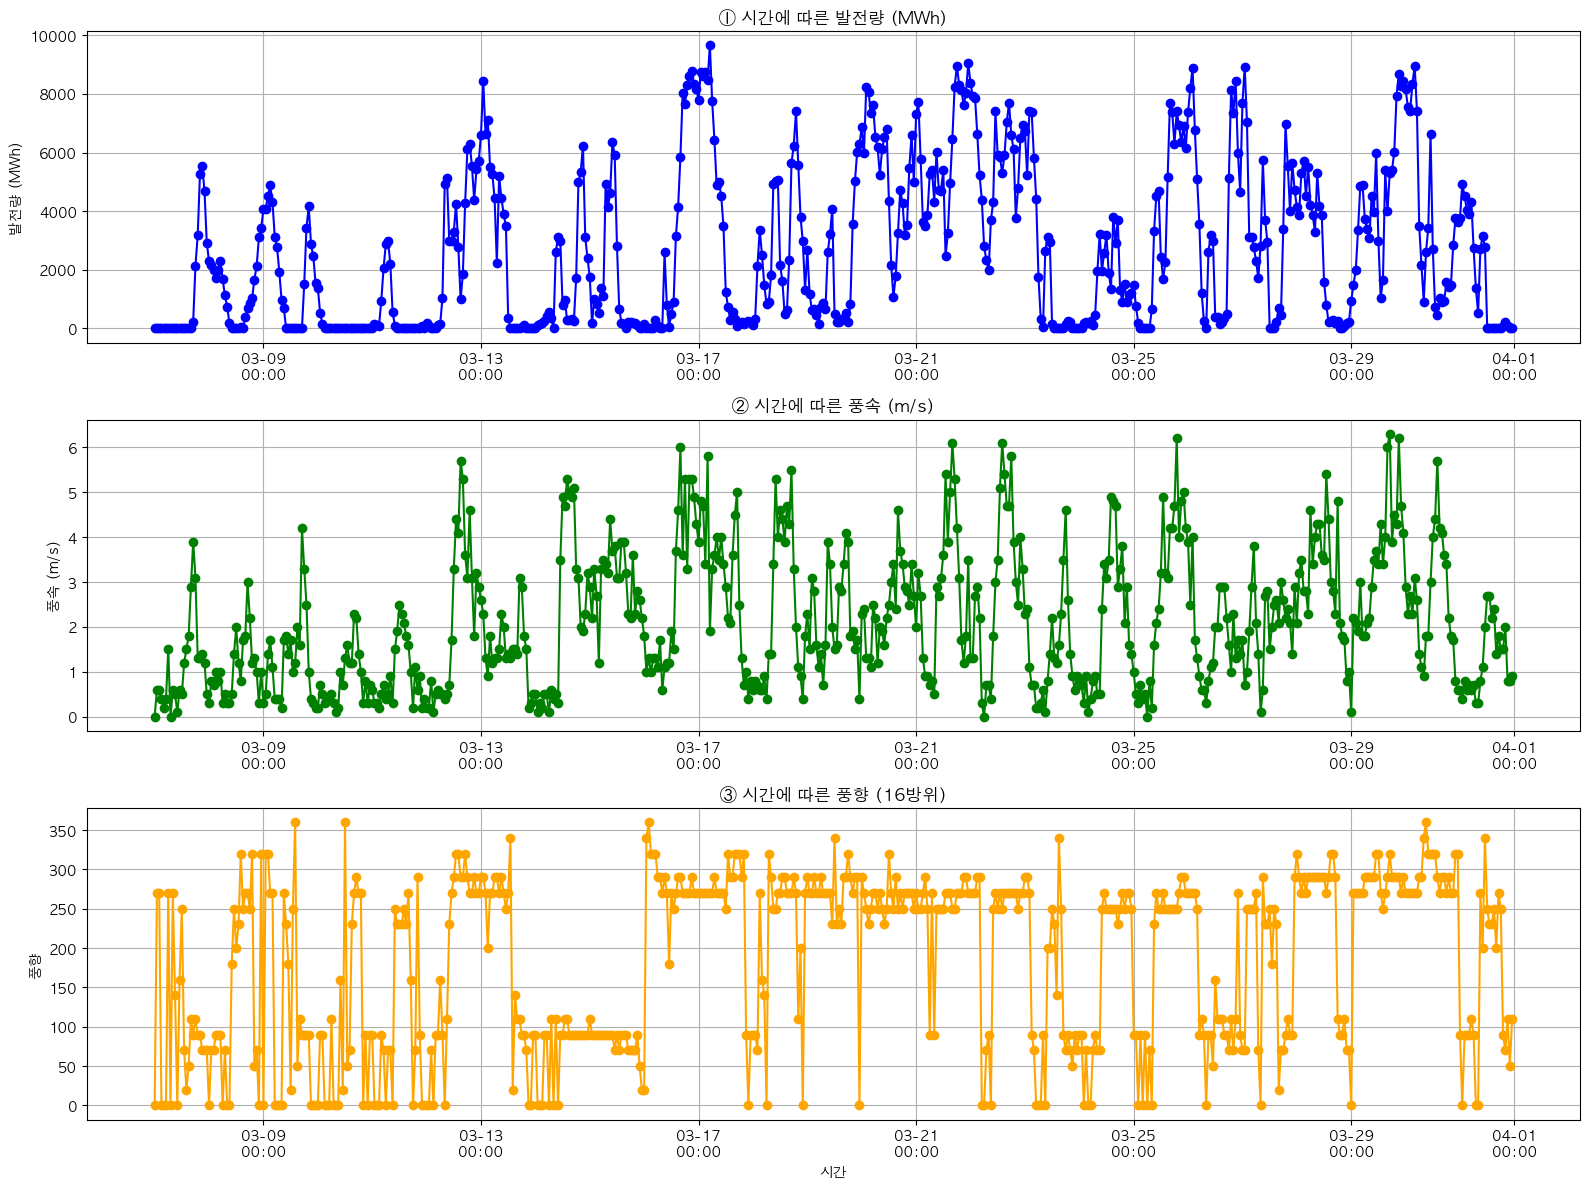

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
# 시각화를 위한 데이터프레임 복사
df_plot = df.copy()
df_plot['시각'] = pd.to_datetime(df_plot['시각'])

# 그래프 스타일 설정
plt.figure(figsize=(16, 12))

# 1. 발전량 시계열
plt.subplot(3, 1, 1)
plt.plot(df_plot['시각'], df_plot['발전량(MWh)'], color='blue', marker='o', linestyle='-')
plt.title('① 시간에 따른 발전량 (MWh)')
plt.ylabel('발전량 (MWh)')
plt.grid(True)

# 2. 풍속 시계열
plt.subplot(3, 1, 2)
plt.plot(df_plot['시각'], df_plot['풍속(m/s)'], color='green', marker='o', linestyle='-')
plt.title('② 시간에 따른 풍속 (m/s)')
plt.ylabel('풍속 (m/s)')
plt.grid(True)

# 3. 풍향 시계열
plt.subplot(3, 1, 3)
plt.plot(df_plot['시각'], df_plot['풍향(16방위)'], color='orange', marker='o', linestyle='-')
plt.title('③ 시간에 따른 풍향 (16방위)')
plt.ylabel('풍향')
plt.xlabel('시간')
plt.grid(True)

# x축 포맷 정리
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d\n%H:%M'))
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [4]:
# 상관관계 계산 (풍속 vs 발전량)
correlation = df[['풍속(m/s)', '발전량(MWh)']].corr()

correlation


,풍속(m/s),발전량(MWh)
풍속(m/s),1.000000,0.368504
발전량(MWh),0.368504,1.000000


In [5]:
# 발전량이 0보다 큰 값만 필터링
nonzero_df = df[df['발전량(MWh)'] > 0]

# 상관관계 재계산 (풍속 vs 발전량)
correlation_nonzero = nonzero_df[['풍속(m/s)', '발전량(MWh)']].corr()

correlation_nonzero


,풍속(m/s),발전량(MWh)
풍속(m/s),1.000000,0.279983
발전량(MWh),0.279983,1.000000
